In [1]:
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import copy
import math

In [25]:
df = pd.read_csv('Housing Price data set.csv')
df = df.drop(['Unnamed: 0'], axis=1)
m = df.shape[0]
n = 4
X = np.array([np.ones(m, np.float32), df['lotsize'].to_numpy(),df['bedrooms'].to_numpy(), df['bathrms'].to_numpy()]).T
Y = df['price'].to_numpy()
sz = X.size/4
k = int(sz*0.7)
X_train, X_test, Y_train, Y_test = X[:k], X[k:], Y[:k], Y[k:]

In [26]:
def scaling(X):
  X1 = copy.deepcopy(X)
  stdv = np.std(X1[:, 0:], axis=0)
  stdv[0] = 1
  mean = np.mean(X1[:, 0:], axis=0)
  mean[0] = 0
  X1[:, 0:] = (X1[:, 0:]-mean) / stdv
  return X1,mean,stdv

In [30]:
def batch_gradient_descent(X_train,Y_train,X_test,Y_test,alpha,itr):
  X_train, MEAN, STDV = scaling(X_train)
  X_test = (X_test - MEAN) / STDV
  X_train, X_test = X_train.T, X_test.T
  W = np.zeros((n, 1))
  for i in range(0, itr):
      H = np.dot(W.T, X_train)
      Z = H - Y_train
      dW = np.dot(X_train, Z.T)
      W = W - (alpha*dW)/(X_train.shape[1])
      J = np.sum(Z**2)/(2*m)
  print("Weights without Regularization: \n", W)
  print()
  pred = np.dot(W.T, X_test)
  error = abs(Y_test - pred)/Y_test
  error = np.sum(error, axis=1)/X_test.shape[1]
  print("Error without Regularization: ",error*100,"%")

In [38]:
def batch_gradient_descent_with_regularization(X_train,Y_train,X_test,Y_test,alpha,itr,lam):
  print("Lambda = ",lam)
  X_train, MEAN, STDV = scaling(X_train)
  X_test = (X_test - MEAN) / STDV
  X_train, X_test = X_train.T, X_test.T
  W = np.zeros((n, 1))
  for i in range(0, itr):
      H = np.dot(W.T, X_train)
      Z = H - Y_train
      dW = np.dot(X_train, Z.T)
      temp = W.copy()
      temp[0,0] = 0
      W = W - (alpha*(dW + lam*temp))/(X.shape[1])
      J = np.sum(Z**2)/(2*m)
  print("Weights with Regularization: \n", W)
  print()
  pred = np.dot(W.T, X_test)
  error = abs(Y_test - pred)/Y_test
  error = np.sum(error, axis=1)/X_test.shape[1]
  print("Error with Regularization: ",error*100,"%")
  err.append((error*100))

In [31]:
print("Batch Gradient Descent Without Regularization:")
print()
batch_gradient_descent(X_train,Y_train,X_test,Y_test,0.01, 10000)

Batch Gradient Descent Without Regularization:

Weights without Regularization: 
 [[63936.35340314]
 [12011.48915726]
 [ 4370.56419059]
 [ 9851.34899367]]

Error without Regularization:  [18.66649001] %


Batch Gradient Descent With Regularization:

1 . 
Lambda =  1
Weights with Regularization: 
 [[63936.35340314]
 [11984.9214701 ]
 [ 4370.80596212]
 [ 9832.27731992]]

Error with Regularization:  [18.65287175] %
2 . 
Lambda =  10
Weights with Regularization: 
 [[63936.35340314]
 [11751.3717808 ]
 [ 4370.59386831]
 [ 9664.48253895]]

Error with Regularization:  [18.53295954] %
3 . 
Lambda =  20
Weights with Regularization: 
 [[63936.35340314]
 [11503.04735128]
 [ 4365.81564994]
 [ 9485.73056594]]

Error with Regularization:  [18.41177486] %
4 . 
Lambda =  50
Weights with Regularization: 
 [[63936.35340314]
 [10820.96072454]
 [ 4329.13408832]
 [ 8992.1987714 ]]

Error with Regularization:  [18.10170692] %
5 . 
Lambda =  100
Weights with Regularization: 
 [[63936.35340314]
 [ 9856.23725097]
 [ 4220.46429903]
 [ 8285.23632805]]

Error with Regularization:  [17.7192985] %
6 . 
Lambda =  150
Weights with Regularization: 
 [[63936.35340314]
 [ 9056.45138456]
 [ 4082.20105556]
 [ 7688.80098815]

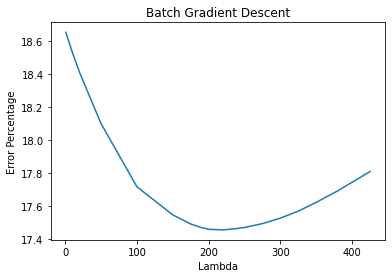

In [46]:
lamb = [1,10,20,50,100,150,175,190,200,220,240,250,275,300,325,350,380,400,425]
err = []
print("Batch Gradient Descent With Regularization:")
print()
cnt=1
for l in lamb:
  print(cnt,". ")
  batch_gradient_descent_with_regularization(X_train,Y_train,X_test,Y_test,0.0001, 10000, l)
  cnt+=1
plt.plot(lamb,err)
plt.xlabel("Lambda")
plt.ylabel("Error Percentage")
plt.title("Batch Gradient Descent")
plt.show()

In [51]:
def stochastic_gradient_descent(X_train,Y_train,X_test,Y_test,alpha,itr):
  X_train, MEAN, STDV = scaling(X_train)
  X_test = (X_test - MEAN) / STDV
  X_train, X_test = X_train.T, X_test.T
  W = np.zeros((n, 1))
  for k in range(0, itr):
      random = np.random.permutation(X_train.shape[1])
      X_shuffle,Y_shuffle = X_train[:,random],Y_train[random]
      for i in range(0,X_train.shape[1]):
        x = X_shuffle[:, i].reshape((-1, 1))
        y = Y_shuffle[i]
        H = np.dot(W.T, x)
        Z = H - y
        dW = x*Z
        W = W - alpha*dW
  print("Weights without Regularizaton: \n", W)
  print()
  pred = np.dot(W.T, X_test)
  error = abs(Y_test - pred)/Y_test
  error = np.sum(error, axis=1)/X_test.shape[1]
  print("Error without Regularizaton: ",error*100,"%")

In [63]:
def stochastic_gradient_descent_with_regularization(X_train,Y_train,X_test,Y_test,alpha,itr,lam):
  print("Lambda = ",lam)
  X_train, MEAN, STDV = scaling(X_train)
  X_test = (X_test - MEAN) / STDV
  X_train, X_test = X_train.T, X_test.T
  W = np.zeros((n, 1))
  for k in range(0, itr):
      random = np.random.permutation(X_train.shape[1])
      X_shuffle,Y_shuffle = X_train[:,random],Y_train[random]
      for i in range(0,X_train.shape[1]):
        x = X_shuffle[:, i].reshape((-1, 1))
        y = Y_shuffle[i]
        H = np.dot(W.T, x)
        Z = H - y
        dW = x*Z
        temp = W.copy()
        temp[0,0]=0
        W = W - alpha*(dW+lam*temp)
  print("Weights with Regularizaton: \n", W)
  print()
  pred = np.dot(W.T, X_test)
  error = abs(Y_test - pred)/Y_test
  error = np.sum(error, axis=1)/X_test.shape[1]
  err.append((error*100))
  print("Error with Regularizaton: ",error*100,"%")

In [54]:
print("Stochastic Gradient Descent Without Regularization:")
print()
stochastic_gradient_descent(X_train,Y_train,X_test,Y_test,0.01, 1000)

Stochastic Gradient Descent Without Regularization:

Weights without Regularizaton: 
 [[63771.68857888]
 [11240.67205482]
 [ 4428.80042331]
 [ 8499.70922801]]

Error without Regularizaton:  [18.22820986] %


Stochastic Gradient Descent With Regularization:

1 . 
Lambda =  0.01
Weights with Regularizaton: 
 [[63251.45831826]
 [10295.98385275]
 [ 3676.39367138]
 [10884.71263606]]

Error with Regularizaton:  [18.60129015] %
2 . 
Lambda =  0.1
Weights with Regularizaton: 
 [[62834.31664669]
 [10672.92607558]
 [ 3790.01262759]
 [ 8549.08822395]]

Error with Regularizaton:  [18.47349492] %
3 . 
Lambda =  0.25
Weights with Regularizaton: 
 [[63383.94765307]
 [ 8814.42724163]
 [ 4225.28128427]
 [ 9127.75302653]]

Error with Regularizaton:  [17.88183135] %
4 . 
Lambda =  0.5
Weights with Regularizaton: 
 [[63797.60039056]
 [ 9844.0743053 ]
 [ 3434.47673058]
 [ 8285.13037382]]

Error with Regularizaton:  [17.74255107] %
5 . 
Lambda =  1
Weights with Regularizaton: 
 [[64011.88822336]
 [ 7974.04860822]
 [ 3125.61770034]
 [ 7635.02091623]]

Error with Regularizaton:  [17.45399796] %
6 . 
Lambda =  1.5
Weights with Regularizaton: 
 [[61714.58148889]
 [ 5309.84560443]
 [ 1356.03325782]
 [ 3029.69319327]

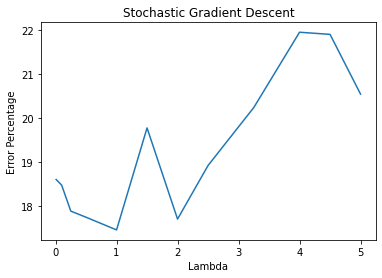

In [64]:
lamb = [0.01,0.1,0.25,0.5,1,1.5,2,2.5,3.25,4,4.5,5]
err = []
print("Stochastic Gradient Descent With Regularization:")
print()
cnt=1
for l in lamb:
  print(cnt,". ")
  stochastic_gradient_descent_with_regularization(X_train,Y_train,X_test,Y_test,0.01, 1000, l)
  cnt+=1
plt.plot(lamb,err)
plt.xlabel("Lambda")
plt.ylabel("Error Percentage")
plt.title("Stochastic Gradient Descent")
plt.show()

In [11]:
def create(X, Y, sizes):
    mini_batches = []
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    num_batches = X.shape[0] // sizes
    i=0
    for i in range(0,num_batches):
      excerpt = indices[i*sizes:(i+1)*sizes]
      X_mini,Y_mini = X[excerpt],Y[excerpt]
      mini_batches.append((X_mini.T,Y_mini))

    if X.shape[0] % sizes != 0:
      excerpt = indices[i*sizes:(i+1)*sizes]
      X_mini, Y_mini = X[excerpt], Y[excerpt]
      mini_batches.append((X_mini.T, Y_mini))
    return mini_batches

In [71]:
def mini_batch_gradient_descent(X_train,Y_train,X_test,Y_test,alpha,itr,sizes):
  X_train, MEAN, STDV = scaling(X_train)
  X_test = (X_test - MEAN) / STDV
  X_train, X_test = X_train.T, X_test.T
  W = np.zeros((n, 1))
  for i in range(0, itr):
      mini_batches = create(X_train.T,Y_train,sizes)
      for mini_batch in mini_batches:
        X_mini,Y_mini = mini_batch
        H = np.dot(W.T, X_mini)
        Z = H - Y_mini
        dW = np.dot(X_mini,Z.T)
        W = W - (alpha*dW)/X_mini.shape[1]
  print("Weights without Regularization: \n", W)
  print()
  pred = np.dot(W.T, X_test)
  error = abs(Y_test - pred)/Y_test
  error = np.sum(error, axis=1)/X_test.shape[1]
  print("Error with without Regularization: ",error*100,"%")

In [76]:
def mini_batch_gradient_descent_with_regularization(X_train,Y_train,X_test,Y_test,alpha,itr,sizes,lam):
  print("Lambda = ",lam)
  X_train, MEAN, STDV = scaling(X_train)
  X_test = (X_test - MEAN) / STDV
  X_train, X_test = X_train.T, X_test.T
  W = np.zeros((n, 1))
  for i in range(0, itr):
      mini_batches = create(X_train.T,Y_train,sizes)
      for mini_batch in mini_batches:
        X_mini,Y_mini = mini_batch
        H = np.dot(W.T, X_mini)
        Z = H - Y_mini
        dW = np.dot(X_mini,Z.T)
        temp = W.copy()
        temp[0,0] = 0
        W = W - (alpha*(dW + lam*temp))/X_mini.shape[1]
  print("Weights with Regularization: \n", W)
  print()
  pred = np.dot(W.T, X_test)
  error = abs(Y_test - pred)/Y_test
  error = np.sum(error, axis=1)/X_test.shape[1]
  err.append((error*100))
  print("Error with Regularization: ",error*100,"%")

In [72]:
batch = [10,20,30,40,50]
cnt=1
print("Mini Batch Gradient Descent without Regularization")
print()
for b in batch:
  print(cnt,". ")
  print("Batch Size = ",b)
  mini_batch_gradient_descent(X_train,Y_train,X_test,Y_test, 0.01, 10000, b)
  cnt+=1
  print()

Mini Batch Gradient Descent without Regularization

1 . 
Batch Size =  10
Weights without Regularization: 
 [[63779.65941902]
 [11721.37245225]
 [ 4219.02226082]
 [ 9651.51967267]]

Error with without Regularization:  [18.5743133] %

2 . 
Batch Size =  20
Weights without Regularization: 
 [[63955.32558673]
 [12086.77059258]
 [ 4287.33211687]
 [10124.94605916]]

Error with without Regularization:  [18.73536194] %

3 . 
Batch Size =  30
Weights without Regularization: 
 [[64021.85442828]
 [12101.33073216]
 [ 4469.96639594]
 [ 9843.65837548]]

Error with without Regularization:  [18.67081279] %

4 . 
Batch Size =  40
Weights without Regularization: 
 [[63948.56588315]
 [11967.88234999]
 [ 4174.597971  ]
 [10126.97391489]]

Error with without Regularization:  [18.68320043] %

5 . 
Batch Size =  50
Weights without Regularization: 
 [[63867.07039579]
 [12079.60328552]
 [ 4365.88206648]
 [10052.56957622]]

Error with without Regularization:  [18.75996553] %



Mini Batch Gradient Descent with Regularization

1 . 
Batch Size =  10
Lambda =  0.01
Weights with Regularization: 
 [[63882.3049379 ]
 [11861.29226954]
 [ 4447.13184061]
 [ 9981.62692218]]

Error with Regularization:  [18.66132772] %

Lambda =  0.1
Weights with Regularization: 
 [[63889.33718636]
 [11872.25618025]
 [ 4323.00549121]
 [ 9756.66458104]]

Error with Regularization:  [18.61239386] %

Lambda =  1
Weights with Regularization: 
 [[63901.37168474]
 [10897.54387336]
 [ 4459.52415927]
 [ 9150.34789351]]

Error with Regularization:  [18.18006275] %

Lambda =  2
Weights with Regularization: 
 [[64094.43960356]
 [10518.32219901]
 [ 4495.00867021]
 [ 8522.36915572]]

Error with Regularization:  [17.86737996] %

Lambda =  3.25
Weights with Regularization: 
 [[64099.95727241]
 [ 9678.19251435]
 [ 4088.3921485 ]
 [ 8179.05567534]]

Error with Regularization:  [17.59647313] %

Lambda =  4.5
Weights with Regularization: 
 [[64065.98592914]
 [ 8813.83904521]
 [ 3866.18133854]
 [ 7310.2926

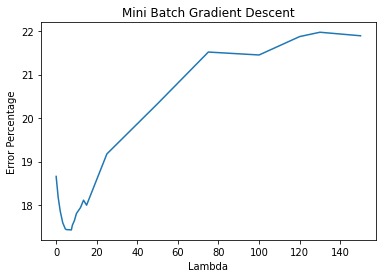

2 . 
Batch Size =  20
Lambda =  0.01
Weights with Regularization: 
 [[63960.25740201]
 [12168.73555573]
 [ 4539.99685925]
 [ 9925.20475262]]

Error with Regularization:  [18.74430407] %

Lambda =  0.1
Weights with Regularization: 
 [[63905.24170665]
 [11910.4247669 ]
 [ 4194.97616749]
 [ 9857.80013115]]

Error with Regularization:  [18.6296752] %

Lambda =  1
Weights with Regularization: 
 [[63886.4419748 ]
 [11542.42724722]
 [ 4357.03340342]
 [ 9560.19450813]]

Error with Regularization:  [18.45814429] %

Lambda =  2
Weights with Regularization: 
 [[63868.52182384]
 [11013.74951536]
 [ 4382.15424947]
 [ 9308.36080179]]

Error with Regularization:  [18.25414459] %

Lambda =  3.25
Weights with Regularization: 
 [[63976.59583563]
 [10516.998294  ]
 [ 4319.25187573]
 [ 8984.09624753]]

Error with Regularization:  [17.99221346] %

Lambda =  4.5
Weights with Regularization: 
 [[63931.67129872]
 [10310.85497884]
 [ 4243.47485975]
 [ 8524.86358065]]

Error with Regularization:  [17.86836897] 

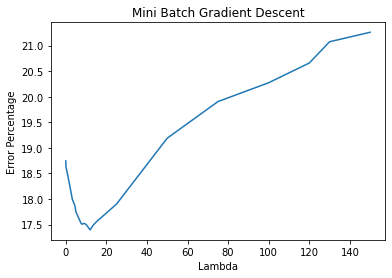

3 . 
Batch Size =  30
Lambda =  0.01
Weights with Regularization: 
 [[63887.40161943]
 [12064.89855353]
 [ 4240.71075625]
 [ 9957.94645388]]

Error with Regularization:  [18.71751962] %

Lambda =  0.1
Weights with Regularization: 
 [[63879.48820145]
 [11744.18349254]
 [ 4535.05785519]
 [10039.89121444]]

Error with Regularization:  [18.634833] %

Lambda =  1
Weights with Regularization: 
 [[63935.3237477 ]
 [11567.92883532]
 [ 4438.87786817]
 [ 9580.29365118]]

Error with Regularization:  [18.45607676] %

Lambda =  2
Weights with Regularization: 
 [[63955.75399565]
 [11482.26141545]
 [ 4378.61594144]
 [ 9424.72058393]]

Error with Regularization:  [18.38693256] %

Lambda =  3.25
Weights with Regularization: 
 [[63893.89569844]
 [11187.73934019]
 [ 4335.42377725]
 [ 9229.77338802]]

Error with Regularization:  [18.27632197] %

Lambda =  4.5
Weights with Regularization: 
 [[63994.49107596]
 [10635.31803932]
 [ 4394.80252877]
 [ 8886.69705772]]

Error with Regularization:  [18.00534439] %

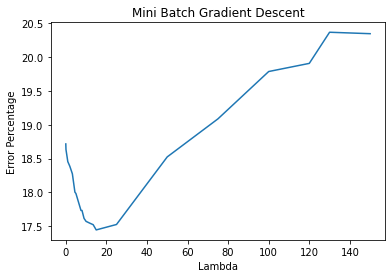

4 . 
Batch Size =  40
Lambda =  0.01
Weights with Regularization: 
 [[63918.51309806]
 [12216.75645219]
 [ 4298.85361134]
 [ 9930.94121419]]

Error with Regularization:  [18.76353675] %

Lambda =  0.1
Weights with Regularization: 
 [[63995.36712241]
 [11955.13857312]
 [ 4340.63598629]
 [ 9690.16592427]]

Error with Regularization:  [18.58928075] %

Lambda =  1
Weights with Regularization: 
 [[63958.44055858]
 [11641.67932512]
 [ 4330.95059919]
 [ 9565.71609905]]

Error with Regularization:  [18.46257379] %

Lambda =  2
Weights with Regularization: 
 [[63901.82768631]
 [11472.70388292]
 [ 4382.49636139]
 [ 9476.96770887]]

Error with Regularization:  [18.41560755] %

Lambda =  3.25
Weights with Regularization: 
 [[63987.22932021]
 [11154.4000416 ]
 [ 4402.97720064]
 [ 9252.45358457]]

Error with Regularization:  [18.23558332] %

Lambda =  4.5
Weights with Regularization: 
 [[63856.75836207]
 [10885.1290971 ]
 [ 4373.41866077]
 [ 9160.8654857 ]]

Error with Regularization:  [18.19224711]

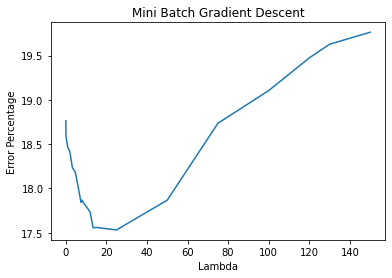

5 . 
Batch Size =  50
Lambda =  0.01
Weights with Regularization: 
 [[63817.41360513]
 [11886.29585324]
 [ 4384.98424636]
 [ 9528.87786546]]

Error with Regularization:  [18.6112396] %

Lambda =  0.1
Weights with Regularization: 
 [[63900.83754215]
 [12032.53520491]
 [ 4361.68312915]
 [ 9773.3546779 ]]

Error with Regularization:  [18.6746996] %

Lambda =  1
Weights with Regularization: 
 [[63883.5612174 ]
 [11622.89601769]
 [ 4267.48891915]
 [ 9560.21622846]]

Error with Regularization:  [18.47989453] %

Lambda =  2
Weights with Regularization: 
 [[63849.49275532]
 [11647.03698909]
 [ 4304.48938375]
 [ 9415.40618929]]

Error with Regularization:  [18.48060291] %

Lambda =  3.25
Weights with Regularization: 
 [[63835.97047136]
 [11411.07751367]
 [ 4228.61398003]
 [ 9400.41099213]]

Error with Regularization:  [18.39726874] %

Lambda =  4.5
Weights with Regularization: 
 [[63956.31835029]
 [11332.16804667]
 [ 4291.00188532]
 [ 9406.42271672]]

Error with Regularization:  [18.32677784] %

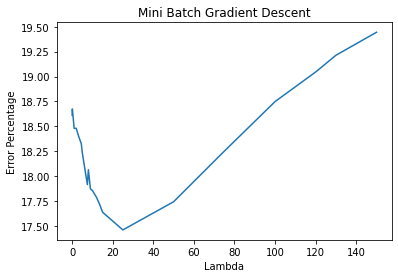

In [83]:
batch = [10,20,30,40,50]
lamb = [0.01,0.1,1,2,3.25,4.5,5,7.5,8,9,10,12,13.5,15,25,50,75,100,120,130,150]
z =[]
cnt=1
print("Mini Batch Gradient Descent with Regularization")
print()
for b in batch:
  err = []
  print(cnt,". ")
  print("Batch Size = ",b)
  for l in lamb:
    mini_batch_gradient_descent_with_regularization(X_train,Y_train,X_test,Y_test, 0.01, 10000, b,l)
    print()
  cnt+=1
  print()
  plt.plot(lamb,err)
  plt.xlabel("Lambda")
  plt.ylabel("Error Percentage")
  z.append(err)
  plt.title("Mini Batch Gradient Descent")
  plt.show()